# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

La idea es visualizar la información de cada tabla para ver si tienen valores ausentes, esto lo podemos hacer importando las librerias y usando la funcion info() para que muestre la informacion necesaria ya que antes de limpiar los datos tenemos que asegurarnos de tenerlos completos.

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
departments.info()
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

- La tabla de "orders" tiene valores ausentes en la columna "days_since_prior_order"
- La tabla de "productos" tiene valores ausentes en la columna "product_name"
- La tabla de "order_products" tiene valores ausentes en la columna "add_to_cart_order"
- Las tablas "aisles" y "departments" no tienen valores ausentes


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print("Valores duplicados:", orders.duplicated().sum())
orders[orders.duplicated()]

Valores duplicados: 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


**¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?**
Si hay 15 filas fuplicadas que tienen en comun el dia y la hora del pedido

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

filtro_dia = orders['order_dow'] == 3
filtro_hora = orders['order_hour_of_day'] == 2

orders[(filtro_dia) & (filtro_hora)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado? puede que algunos se duplicaron por error 

In [10]:
# Elimina los pedidos duplicados
orders.drop_duplicates(inplace= True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(orders.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Se encontraron 15 filas duplicadas que tenian en comun el dia y la hora de orden, vimos que no es coincidencia el miercoles a las 2 porque hay más registros a esa hora que no estan duplicados entonces puede que haya sido un error y de esos 15 esfecificos. La solucion fue borrar las filas que tenian duplicados verificando que la suma de duplicados sea 0 en especial en la columna "order_id" ya que se supone que ca orden tiene un valor unico

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()


0

In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
products["department_id"].duplicated().sum()

49673

In [15]:
products["department_id"].max()

21

In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

products["product_name"] = products["product_name"].str.upper()
products["product_name"].duplicated().sum()

1361

In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
duplicados_sin_nulos = products['product_name'].duplicated(keep=False) & products['product_name'].notna()
print(duplicados_sin_nulos.sum())

207


Describe brevemente tus hallazgos y lo que hiciste con ellos.

La tabla de products no presenta con valores de filas duplicadas, en el caso de la columna de "departamentos" si dice que hay duplicados porque solo existen 21 departamentos.
Se paso el nombre de los productos a mayusculas para que todos los nombres tengan el mismo formato y asi detectar si hay duplicados.
En efecto hay nombres de productos duplicados no nulos

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
departments["department_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron ningun duplicado en la tabla de "departments"

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [21]:
# Revisa únicamente si hay IDs duplicadas de pasillos
aisles["aisle_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron ningun duplicado en la tabla de "aisles"

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()


0

In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products["order_id"].duplicated().sum()

4094961

In [24]:
#borrar los valores duplicados


In [25]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontraron valores duplicados en la columna de "order_id" en la tabla de "order_products" lo cual quiere decir que hay un error, ya que se supone que el id del orden es unico y aqui se encuentran muchos duplicados.

Se borraron los valores duplicados de la columna "order_id"

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [26]:
# Encuentra los valores ausentes en la columna 'product_name'

products["product_name"].isnull().sum()

1258

Describe brevemente cuáles son tus hallazgos.
Hay 1258 valores ausentes en la columna de "product_name"

In [27]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products["product_name"].isnull()) & (products["aisle_id"] == 100)]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.
Si, todas estan relacionadas con el pasillo 100 ya que el numero de columnas coincide con el numero de valores ausentes

In [28]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products["product_name"].isnull()) & (products["department_id"] == 21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Si, todos los nombres de producto ausente están relacionados con el departamento 21

In [29]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
products = products.merge(aisles, on="aisle_id", how="left")
products = products.merge(departments, on="department_id", how="left")
products[(products["aisle_id"] == 100) & (products["department_id"] == 21)]


,product_id,product_name,aisle_id,department_id,aisle,department
37,38,NaN,100,21,missing,missing
71,72,NaN,100,21,missing,missing
109,110,NaN,100,21,missing,missing
296,297,NaN,100,21,missing,missing
416,417,NaN,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,NaN,100,21,missing,missing
49574,49575,NaN,100,21,missing,missing
49640,49641,NaN,100,21,missing,missing
49663,49664,NaN,100,21,missing,missing


Describe brevemente cuáles son tus hallazgos. Concide que en la isla 100 y el departamento 21 no se tiene el nombre del producto

In [30]:
# Completa los nombres de productos ausentes con 'Unknown'
columna_remplazar= ["product_name"]

for col in columna_remplazar:
    products[col].fillna("Unknown", inplace=True)

products[(products["aisle_id"] == 100) & (products["department_id"] == 21)]

,product_id,product_name,aisle_id,department_id,aisle,department
37,38,Unknown,100,21,missing,missing
71,72,Unknown,100,21,missing,missing
109,110,Unknown,100,21,missing,missing
296,297,Unknown,100,21,missing,missing
416,417,Unknown,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Unknown,100,21,missing,missing
49574,49575,Unknown,100,21,missing,missing
49640,49641,Unknown,100,21,missing,missing
49663,49664,Unknown,100,21,missing,missing


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se remplazo de NaN a unknown para que ya no aparezca como valores ausentes

### `orders` data frame

In [31]:
# Encuentra los valores ausentes
orders.isnull().sum()


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [32]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[orders["days_since_prior_order"].isnull()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Es correcto que la columna "days_since_prior_order" contenga valores NaN cuando el "order_number" es igual a 1. Esto se debe a que dichos registros corresponden a la primera orden realizada por el usuario, y por lo tanto, no existe una orden previa con la cual calcular los días transcurridos. En este contexto, el valor nulo es completamente válido y esperado.

### `order_products` data frame

In [33]:
# Encuentra los valores ausentes
order_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [34]:
order_products[order_products["add_to_cart_order"].isna()]


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [35]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products["add_to_cart_order"].min(),order_products["add_to_cart_order"].max())

1.0 64.0


Describe brevemente cuáles son tus hallazgos.

Se encontraron pedidos con valores faltantes (NaN) en la columna add_to_cart_order, lo cual podría indicar registros incompletos o errores en la captura de datos.

Se saco el maximo y el minimo para encontrar la razon por la cual add_to_cart_order tiene NaN´s

In [36]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_cart_order = order_products[order_products["add_to_cart_order"].isna()]["order_id"].unique()

print(missing_cart_order)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [37]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

order_products_nan = order_products[order_products["order_id"].isin(missing_cart_order)]
op_group = order_products_nan.groupby("order_id")["product_id"].count()
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

print(op_group.min())


65


Describe brevemente cuáles son tus hallazgos.


Agrupando estos pedidos por order_id y contando cuántos productos (product_id) hay en cada uno, el minimo de esa lista era de 65 pedidos, habia más e 64 ordenes de ese producto esto indica el porque esas ordenes se les ponia NaN (porque el valor maximo era 64)



In [38]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

order_products["add_to_cart_order"] = order_products["add_to_cart_order"].fillna(999).astype(int)


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se corrigio cambiando el numero a 999 para que suba el limite y no se quede en valor nulo

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Se llevó a cabo un proceso integral de limpieza de datos para optimizar su legibilidad y precisión. Esto incluyó el tratamiento de valores nulos mediante técnicas de imputación adecuadas y la eliminación de filas duplicadas que podían distorsionar los resultados del análisis. Como resultado, se obtuvo un conjunto de datos más coherente, confiable y listo para su explotación analítica.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [39]:
print("order_hour_of_day - valores únicos:", sorted(orders['order_hour_of_day'].unique()))


order_hour_of_day - valores únicos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [40]:
print("order_dow - valores únicos:", sorted(orders['order_dow'].unique()))

order_dow - valores únicos: [0, 1, 2, 3, 4, 5, 6]


Escribe aquí tus conclusiones

si esta correcto order_hour_of_day indica las 24 horas del dia y order_dow el numero de dia de la semana

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

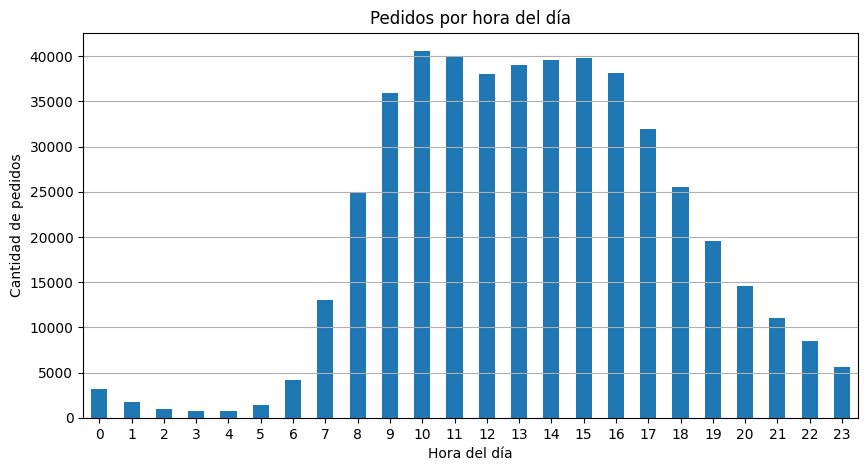

In [41]:
orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pedidos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Escribe aquí tus conclusiones

Se puede ver como los horarios de mayor pedido son entre 9hrs a 14hr, el grafico indica que la hora de mayor del 

### [A3] ¿Qué día de la semana compran víveres las personas?

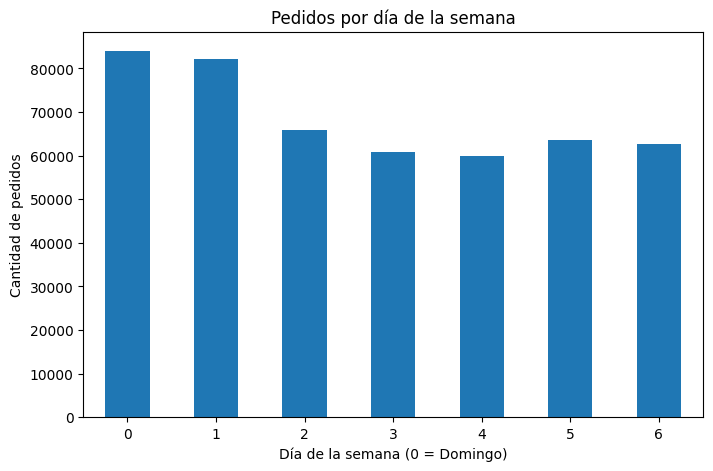

In [42]:
orders["order_dow"].value_counts().sort_index().plot(kind='bar', figsize=(8,5), title ='Pedidos por día de la semana', xlabel='Día de la semana (0 = Domingo)', ylabel="Cantidad de pedidos", rot=0)


plt.show()


Escribe aquí tus conclusiones

El domingo es el dia en el que más compran viveres

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

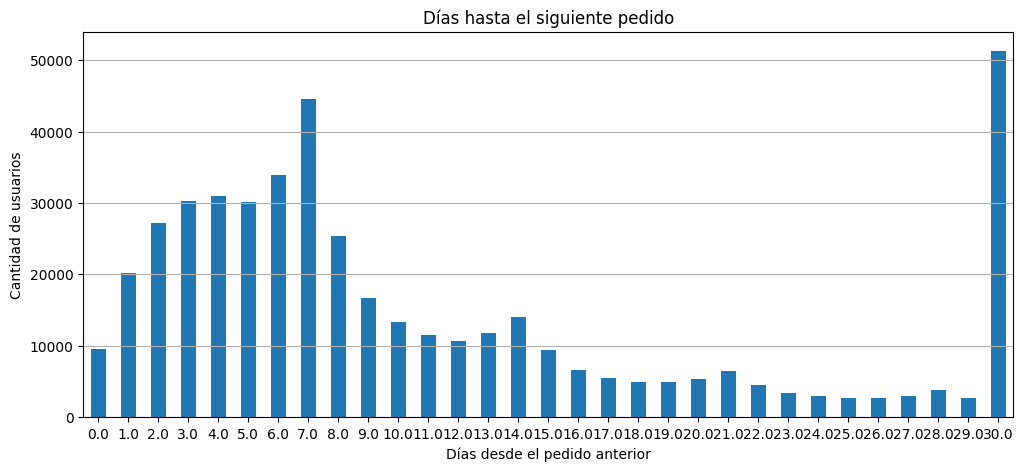

Día mínimo: 0.0
Día máximo: 30.0


In [43]:
orders['days_since_prior_order'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title('Días hasta el siguiente pedido')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Cantidad de usuarios')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print("Día mínimo:", orders['days_since_prior_order'].min())
print("Día máximo:", orders['days_since_prior_order'].max())

Escribe aquí tus conclusiones
La tabla nos enseña que varios usuarios hacen pedidos despues de 30 dias, pero tambien hay una gran cantidad entre los primeros dias de 2 a 7 en especial el dia 7

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [44]:
wednesday_orders = orders[orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
saturday_orders = orders[orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

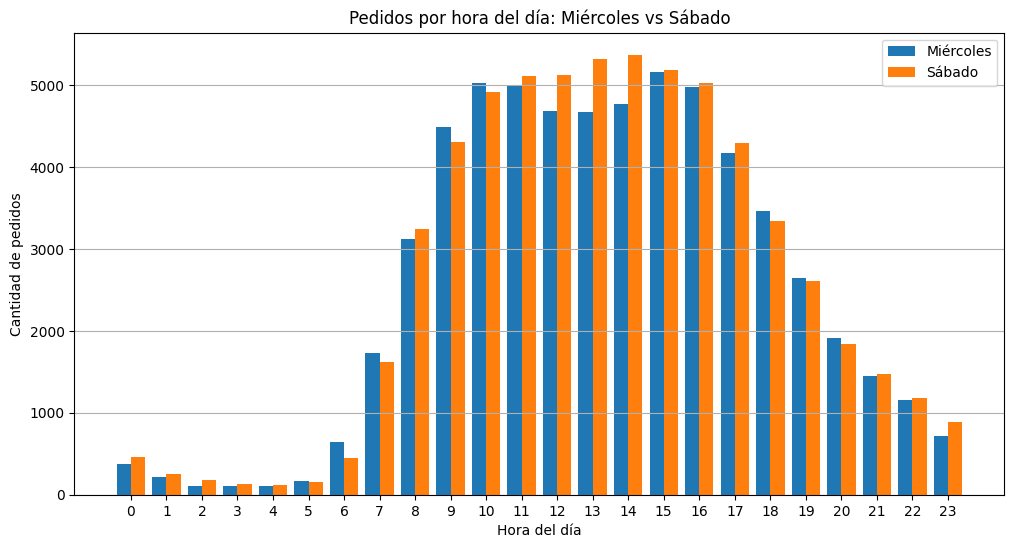

In [45]:

plt.figure(figsize=(12,6))
plt.bar(wednesday_orders.index - 0.2, wednesday_orders.values, width=0.4, label='Miércoles')
plt.bar(saturday_orders.index + 0.2, saturday_orders.values, width=0.4, label='Sábado')

plt.title('Pedidos por hora del día: Miércoles vs Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pedidos')
plt.legend()
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

Escribe aquí tus conclusiones

En general se nota que los sabados se hacen más pedidos en el dia, pero tanto miercoles como sabado siguen la misma curva de distribucion en la cual empieza muy baja en la madrugada, despues crece y llega a su maximo entre las 2pm y las 3pm y despues desiende. La unica diferencia es que sabado suele tener más pedidos

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

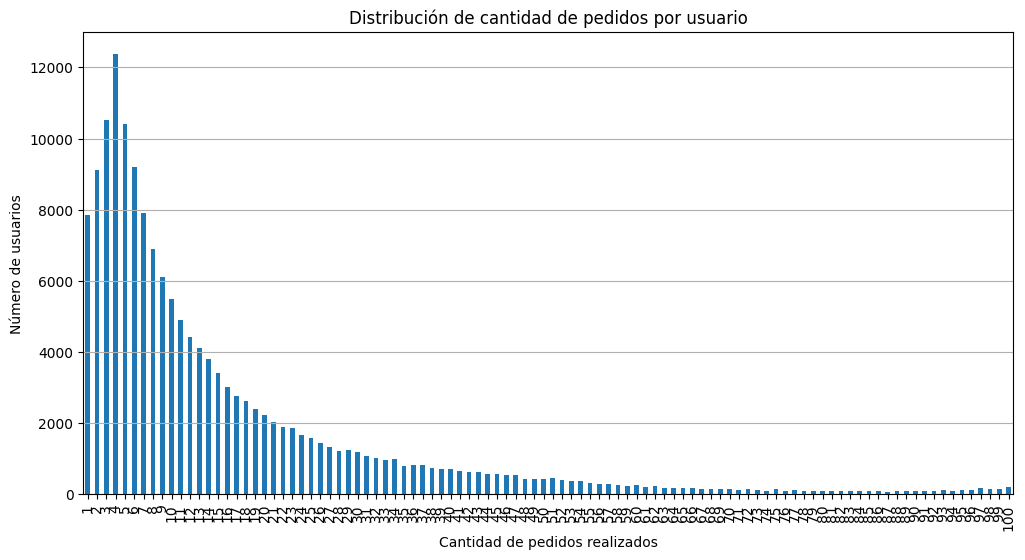

In [46]:

user_order_counts = orders.groupby('user_id')['order_number'].max()


user_order_counts.value_counts().sort_index().plot(kind='bar', figsize=(12,6))

plt.title('Distribución de cantidad de pedidos por usuario')
plt.xlabel('Cantidad de pedidos realizados')
plt.ylabel('Número de usuarios')
plt.grid(axis='y')
plt.show()

Escribe aquí tus conclusiones
La mayoria de los usuarios hacen entre 2 a 6 pedidos

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
top_products = order_products['product_id'].value_counts().head(20).reset_index()
top_products.columns = ['product_id', 'order_count']

# Unir con nombres
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id')

# Mostrar resultado
print(top_products[['product_id', 'product_name', 'order_count']])

    product_id              product_name  order_count
0        24852                    BANANA        66050
1        13176    BAG OF ORGANIC BANANAS        53297
2        21137      ORGANIC STRAWBERRIES        37039
3        21903      ORGANIC BABY SPINACH        33971
4        47209      ORGANIC HASS AVOCADO        29773
5        47766           ORGANIC AVOCADO        24689
6        47626               LARGE LEMON        21495
7        16797              STRAWBERRIES        20018
8        26209                     LIMES        19690
9        27845        ORGANIC WHOLE MILK        19600
10       27966       ORGANIC RASPBERRIES        19197
11       22935      ORGANIC YELLOW ONION        15898
12       24964            ORGANIC GARLIC        15292
13       45007          ORGANIC ZUCCHINI        14584
14       39275       ORGANIC BLUEBERRIES        13879
15       49683            CUCUMBER KIRBY        13675
16       28204        ORGANIC FUJI APPLE        12544
17        5876             O

Escribe aquí tus conclusiones

Los productos más populares suelen ser productos organicos


# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
items_per_order = order_products.groupby('order_id').size()

In [49]:
print("Media de artículos por pedido:", items_per_order.mean())
print("Mediana:", items_per_order.median())
print("Máximo:", items_per_order.max())

Media de artículos por pedido: 10.098983215049127
Mediana: 8.0
Máximo: 127


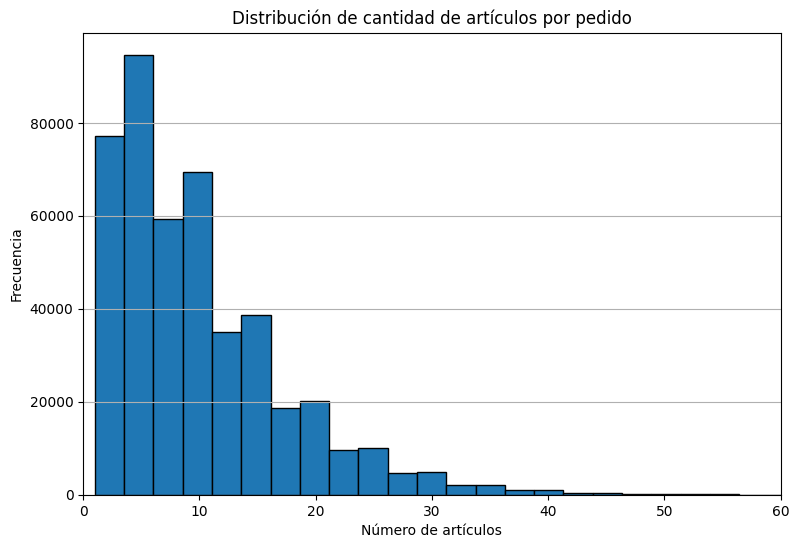

In [50]:

# Distribución
plt.figure(figsize=(9,6))
items_per_order.plot(kind='hist', bins=50, edgecolor='k', xlim=[0,60])
plt.title('Distribución de cantidad de artículos por pedido')
plt.xlabel('Número de artículos')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

Escribe aquí tus conclusiones
La mayoria de los pedidos compran entre 1 a 10 articulos y va disminuyendo despues de esa cantidad

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
reordered = order_products[order_products['reordered'] == 1]

# Contar cuántas veces se reordenó cada producto
top_reordered = reordered['product_id'].value_counts().head(20).reset_index()
top_reordered.columns = ['product_id', 'reorder_count']

# Unir con nombres de productos
top_reordered = top_reordered.merge(products[['product_id', 'product_name']], on='product_id')

print(top_reordered[['product_id', 'product_name', 'reorder_count']])

    product_id              product_name  reorder_count
0        24852                    BANANA          55763
1        13176    BAG OF ORGANIC BANANAS          44450
2        21137      ORGANIC STRAWBERRIES          28639
3        21903      ORGANIC BABY SPINACH          26233
4        47209      ORGANIC HASS AVOCADO          23629
5        47766           ORGANIC AVOCADO          18743
6        27845        ORGANIC WHOLE MILK          16251
7        47626               LARGE LEMON          15044
8        27966       ORGANIC RASPBERRIES          14748
9        16797              STRAWBERRIES          13945
10       26209                     LIMES          13327
11       22935      ORGANIC YELLOW ONION          11145
12       24964            ORGANIC GARLIC          10411
13       45007          ORGANIC ZUCCHINI          10076
14       49683            CUCUMBER KIRBY           9538
15       28204        ORGANIC FUJI APPLE           8989
16        8277  APPLE HONEYCRISP ORGANIC        

Escribe aquí tus conclusiones

La mayoria productos organicos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [52]:
total_orders = order_products.groupby('product_id').size()
total_reorders = order_products.groupby('product_id')['reordered'].sum()

print(total_orders)
print(total_reorders)

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Length: 45573, dtype: int64
product_id
1        158
2          0
3         31
4         25
7          1
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Name: reordered, Length: 45573, dtype: int64


In [53]:
reorder_rate = (total_reorders / total_orders).sort_values(ascending=False)
reorder_rate_df = reorder_rate.reset_index().merge(products, on='product_id')
print(reorder_rate_df.head(20))

    product_id    0                                       product_name  \
0        14721  1.0                            BONE STRENGTH TAKE CARE   
1        20949  1.0                           VANILLA SANDWICH COOKIES   
2         6723  1.0                                   PALMIERS- PETITE   
3         6732  1.0                  NATURALLY SPARKLING MINERAL WATER   
4        45088  1.0  CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & ...   
5        45078  1.0                                       POMEGRANATEA   
6        21016  1.0       PARCHMENT LINED 8 IN X 3.75 IN X 2.5 IN PANS   
7        21005  1.0                        PEANUT BUTTER PIE ICE CREAM   
8        35192  1.0                         CHOCOLATE SOY MILK SINGLES   
9        35197  1.0  MOCHA CHOCOLATE CHIP  ORGANIC NON-DAIRY FROZEN...   
10        6810  1.0                        RASPBERRY GOJI PALEO PRINTS   
11       45040  1.0                                 HEAD LOCK MEGA GEL   
12       45035  1.0                   

Escribe aquí tus conclusiones

Estos productos tienen una fidelidad del 100%. No fueron comprados por nuevos clientes, sino que siempre fueron reordenados por alguien que ya los había probado.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:

merged = order_products.merge(orders[['order_id', 'user_id']], on='order_id')

# Agrupar por usuario
user_total = merged.groupby('user_id').size()
user_reordered = merged.groupby('user_id')['reordered'].sum()

user_reorder_ratio = (user_reordered / user_total).reset_index()
user_reorder_ratio.columns = ['user_id', 'user_reorder_ratio']
print(user_reorder_ratio.head())

   user_id  user_reorder_ratio
0        2            0.038462
1        4            0.000000
2        5            0.666667
3        6            0.000000
4        7            0.928571


Escribe aquí tus conclusiones

La tasa de repetición varía bastante entre los usuarios. Algunos repiten casi todo lo que compran, mientras que otros prueban productos nuevos con más frecuencia.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [55]:
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]
first_counts = first_in_cart['product_id'].value_counts().head(20).reset_index()
first_counts.columns = ['product_id', 'first_in_cart_count']

# Unir con nombres
first_top = first_counts.merge(products, on='product_id')
print(first_top[['product_id', 'product_name', 'first_in_cart_count']])

    product_id                 product_name  first_in_cart_count
0        24852                       BANANA                15562
1        13176       BAG OF ORGANIC BANANAS                11026
2        27845           ORGANIC WHOLE MILK                 4363
3        21137         ORGANIC STRAWBERRIES                 3946
4        47209         ORGANIC HASS AVOCADO                 3390
5        21903         ORGANIC BABY SPINACH                 3336
6        47766              ORGANIC AVOCADO                 3044
7        19660                 SPRING WATER                 2336
8        16797                 STRAWBERRIES                 2308
9        27966          ORGANIC RASPBERRIES                 2024
10       44632   SPARKLING WATER GRAPEFRUIT                 1914
11       49235          ORGANIC HALF & HALF                 1797
12       47626                  LARGE LEMON                 1737
13         196                         SODA                 1733
14       38689     ORGANI

Escribe aquí tus conclusiones

### Conclusion general del proyecto:


La mayoría compra entre 10 a.m. y 4 p.m.
Domingo y lunes son los días con más pedidos.
Los usuarios suelen pedir 5 a 10 artículos por orden.
Hay productos que siempre se añaden primero al carrito (probablemente sus favoritos).
Muchos productos tienen una alta tasa de repetición (hasta del 100%).
Algunos usuarios repiten casi todos sus productos; otros prueban cosas nuevas.
Algunos hacen pocos pedidos, otros son clientes muy frecuentes.